In [8]:
import sys
sys.path.insert(0, '../../packages/')

import torch
import matplotlib.pyplot as plt

from openTSNE import TSNE


In [2]:
# !pip install opentsne

In [3]:
data_dir = "../../data/tensors_meteo20000101to20210630_dust_0_m24_24_48_72/presentation_set/"

presentation_meteorology_train_path = data_dir+"tensor_train_meteorology.pkl"
presentation_meteorology_valid_path = data_dir+"tensor_valid_meteorology.pkl"
presentation_dust_train_path = data_dir+"tensor_train_dust.pkl"
presentation_dust_valid_path = data_dir+"tensor_valid_dust.pkl"
presentation_times_train_path = data_dir+"times_train.pkl"
presentation_times_valid_path = data_dir+"times_valid.pkl"

In [4]:
presentation_meteorology_valid = torch.load(presentation_meteorology_valid_path)

In [5]:
presentation_meteorology_valid.shape, presentation_meteorology_valid.flatten(1).shape

(torch.Size([2183, 17, 81, 81]), torch.Size([2183, 111537]))

In [16]:
tsne = TSNE(
    perplexity=30,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)

In [ ]:
%time embedding_valid = tsne.fit(presentation_meteorology_valid.flatten(1))

--------------------------------------------------------------------------------
TSNE(n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 532.59 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.04 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 6.05 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 3.3807, 50 iterations in 0.1691 sec
Iteration  100, KL divergence 3.0514, 50 iterations in 0.1735 sec
Iteration  150, KL divergence 2.9838, 50 iterations in 0.1569 sec
Iteration  200, KL divergence 2.9515, 50 iterations in 0.1549 sec
Iteration  250, KL divergence 2.9320, 50 iterations in 0.1513 sec
   --> Time elapsed: 0.81 seconds
===> Running optimization with exaggeration=1.00, lr=200.00 for 500

In [ ]:
plt.scatter(embedding_valid[:,0],embedding_valid[:,1])

In [53]:
# scatter?

In [54]:
embedding_valid.shape

(2183, 2)

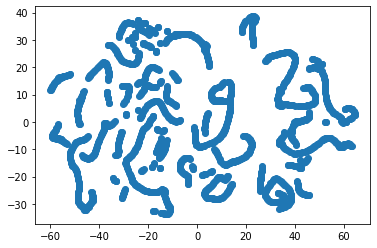

In [55]:
plt.scatter(embedding_valid[:,0],embedding_valid[:,1])

In [25]:
results_dir = "../../results_models/presentation/"

In [57]:
torch.save(embedding_valid,results_dir+"tSNE_valid_presentation.pkl")

In [20]:
presentation_meteorology_train = torch.load(presentation_meteorology_train_path)
%time embedding_train = tsne.fit(presentation_meteorology_train[:6000].flatten(1))

   --> Time elapsed: 1946.41 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.10 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 17.14 seconds
===> Running optimization with exaggeration=12.00, lr=500.00 for 250 iterations...
Iteration   50, KL divergence 4.2845, 50 iterations in 0.5313 sec
Iteration  100, KL divergence 3.8859, 50 iterations in 0.4593 sec
Iteration  150, KL divergence 3.7963, 50 iterations in 0.4633 sec
Iteration  200, KL divergence 3.7554, 50 iterations in 0.4745 sec
Iteration  250, KL divergence 3.7339, 50 iterations in 0.5272 sec
   --> Time elapsed: 2.46 seconds
===> Running optimization with exaggeration=1.00, lr=500.00 for 500 iterations...
Iteration   50, KL divergence 2.0733, 50 iterations in 0.4819 sec
Iteration  100, KL divergence 1.5020, 50 iterations in 0.5016 sec
Iteration  150, KL divergence 1.2217, 50 iterations in 0.5828 sec
Iteration  200, KL divergence 1.0610, 50 iterations in 0.5370 sec
Iteration  250, KL d

In [22]:
presentation_meteorology_train.shape, presentation_meteorology_train.flatten(1).shape

(torch.Size([37469, 17, 81, 81]), torch.Size([37469, 111537]))

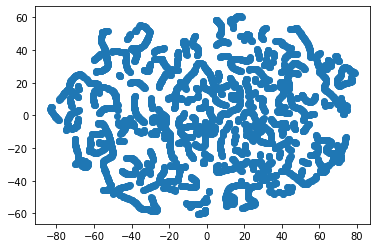

In [23]:
plt.scatter(embedding_train[:,0],embedding_train[:,1])

In [26]:
torch.save(embedding_train,results_dir+"tSNE_train_presentation_6000.pkl")

In [27]:
# sequences - valid year
presentation_meteorology_sequential_valid_path = data_dir+"meteorology_sequential_0m12243648_valid.pkl"
presentation_dust_sequential_valid_path = data_dir+"dust_sequential_0m12243648_valid.pkl"
presentation_times_sequential_valid_path = data_dir+"times_sequential_0m12243648_valid.pkl"

In [28]:
presentation_meteorology_valid.shape, presentation_meteorology_valid.flatten(1).shape

(torch.Size([2183, 17, 81, 81]), torch.Size([2183, 111537]))

In [32]:
presentation_meteorology_valid_sequence = torch.load(presentation_meteorology_sequential_valid_path)
%time embedding_valid_sequence = tsne.fit(presentation_meteorology_valid_sequence.flatten(1))

--------------------------------------------------------------------------------
TSNE(n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 1939.46 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.04 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 23.66 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 3.0320, 50 iterations in 0.1756 sec
Iteration  100, KL divergence 2.6828, 50 iterations in 0.1227 sec
Iteration  150, KL divergence 2.6032, 50 iterations in 0.1196 sec
Iteration  200, KL divergence 2.5643, 50 iterations in 0.1247 sec
Iteration  250, KL divergence 2.5423, 50 iterations in 0.1185 sec
   --> Time elapsed: 0.66 seconds
===> Running optimization with exaggeration=1.00, lr=200.00 for 5

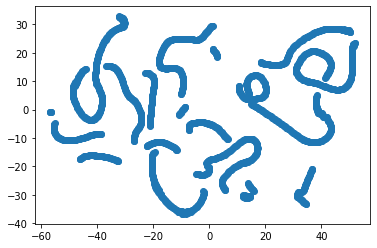

In [33]:
plt.scatter(embedding_valid_sequence[:,0],embedding_valid_sequence[:,1])

In [34]:
torch.save(embedding_valid_sequence,results_dir+"tSNE_sequence_valid_presentation.pkl")

In [38]:
presentation_meteorology_valid_sequence.shape

torch.Size([1636, 85, 81, 81])

In [37]:
# sequences - 2017+2018 year
presentation_meteorology_sequential_train_path = data_dir+"meteorology_sequential_0m12243648_train_2018.pkl"
presentation_dust_sequential_train_path = data_dir+"dust_sequential_0m12243648_train_2018.pkl"
presentation_times_sequential_train_path = data_dir+"times_sequential_0m12243648_train_2018.pkl"

In [36]:
a = 2
a

2

In [ ]:
presentation_meteorology_sequential_train = torch.load(results_dir+"presentation_meteorology_sequential_train_path")

In [43]:
presentation_meteorology_sequential_2017_2018_0m12243648 = torch.cat((presentation_meteorology_valid_sequence,
                                                                      presentation_meteorology_sequential_train),0)
presentation_meteorology_sequential_2017_2018_0m12243648.shape

torch.Size([3528, 85, 81, 81])

In [ ]:
%time embedding_sequential_2017_2018 = tsne.fit(presentation_meteorology_sequential_2017_2018_0m12243648.flatten(1))
torch.save(embedding_sequential_2017_2018,results_dir+"tSNE_sequence_2017_2018_0m12243648_presentation.pkl")
plt.scatter(embedding_sequential_2017_2018[:,0],embedding_sequential_2017_2018[:,1])

--------------------------------------------------------------------------------
TSNE(n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
